In [1]:
import torch
from sklearn.datasets import load_iris

/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris = load_iris()
iris.data[0,:]

array([5.1, 3.5, 1.4, 0.2])

In [3]:
torch.diag(torch.rand(3))

tensor([[0.2395, 0.0000, 0.0000],
        [0.0000, 0.0804, 0.0000],
        [0.0000, 0.0000, 0.7962]])

In [6]:
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [7]:
x = torch.FloatTensor([1, 2])
y = torch.FloatTensor([3, 4])
x + y

tensor([4., 6.])

In [8]:
# zero mean vector
x - x.mean()

tensor([-0.5000,  0.5000])

In [9]:
x.T @ y

/tmp/ipykernel_2970152/734578193.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484809662/work/aten/src/ATen/native/TensorShape.cpp:2981.)
  x.T @ y


tensor(11.)

In [13]:
y @ x.reshape(-1, 1)

tensor([11.])

In [15]:
x = iris.data
print(f'inner product 0 and 1: {x[0] @ x[1]}')
print(f'inner product 0 and 2: {x[0] @ x[2]}')
print(f'inner product 0 and 51: {x[0] @ x[51]}')
print(f'inner product 0 and 52: {x[0] @ x[52]}')

inner product 0 and 1: 37.489999999999995
inner product 0 and 2: 37.03
inner product 0 and 51: 50.44
inner product 0 and 52: 53.199999999999996


In [25]:
def sqrt(x):
  return (x @ x)**(1/2)
print(f'cosine similarity 0 and 1: {x[0]/sqrt(x[0]) @ x[1]/sqrt(x[1]):0.5}')
print(f'cosine similarity 0 and 2: {x[0]/sqrt(x[0]) @ x[2]/sqrt(x[2]):0.5}')
print(f'cosine similarity 0 and 51: {x[0]/sqrt(x[0]) @ x[51]/sqrt(x[51]):0.5}')
print(f'cosine similarity 0 and 52: {x[0]/sqrt(x[0]) @ x[52]/sqrt(x[52]):0.5}')


cosine similarity 0 and 1: 0.99858
cosine similarity 0 and 2: 0.99999
cosine similarity 0 and 51: 0.92599
cosine similarity 0 and 52: 0.91766


In [36]:
xn = x @ x.T
xn = xn.diagonal()
xn = xn**(1/2)

In [42]:
xx = x @ x.T
xxn = xx / xn
xxnn = xxn / xn.reshape(-1, 1)

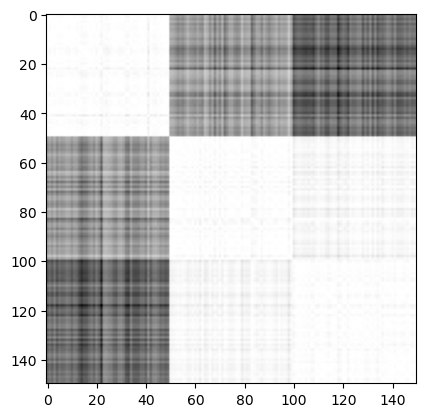

In [43]:
import matplotlib.pyplot as plt

plt.imshow(xxnn, cmap='gray')

In [44]:
from sklearn.datasets import load_digits
x = load_digits().data

In [46]:
xx = x @ x.T
xx.shape

(1797, 1797)

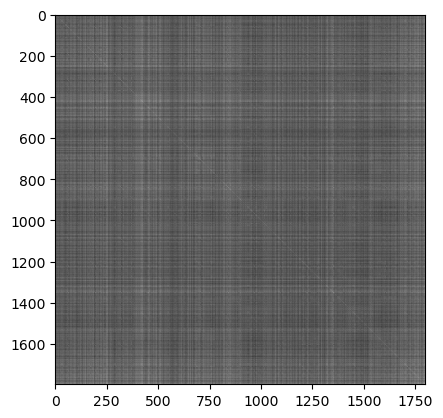

In [47]:
plt.imshow(xx, cmap='gray')

In [48]:
a = torch.FloatTensor([
  [1,2],
  [3,4]
])
b = torch.FloatTensor([
  [5,6],
  [7,8]
])

print(a @ b)
print(b @ a)

tensor([[19., 22.],
        [43., 50.]])
tensor([[23., 34.],
        [31., 46.]])


In [59]:
a = torch.arange(1, 4, 1, dtype=torch.float)
a @ a.T

tensor(14.)

In [60]:
a.dtype

torch.float32

In [61]:
torch.ones((3, 1)) @ a.reshape(1, 3)

tensor([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]])

In [66]:
a = torch.arange(1, 13, 1, dtype=torch.float).reshape(3, 4)
a

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [69]:
a_ = a.T @ torch.ones((3, 1)) / 3

In [72]:
a_ = a_.reshape(-1)
a_

tensor([5., 6., 7., 8.])

In [74]:
x_ = a_.repeat((3,1))
x_

tensor([[5., 6., 7., 8.],
        [5., 6., 7., 8.],
        [5., 6., 7., 8.]])

In [81]:
torch.ones((3, 1)) @ torch.ones((1, 3)) @ a

tensor([[15., 18., 21., 24.],
        [15., 18., 21., 24.],
        [15., 18., 21., 24.]])

In [82]:
torch.ones((3, 1)) @ torch.ones((1, 3)) @ a / 3

tensor([[5., 6., 7., 8.],
        [5., 6., 7., 8.],
        [5., 6., 7., 8.]])